In [2]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

Type1 = pd.read_csv('BYG1.tsv', sep = '\t')

T1allmet_one = Type1.drop_duplicates(subset='KEGG_cid',keep='first').set_index('KEGG_cid')
T1allmet = Type1.set_index('KEGG_cid')

Type2 = pd.read_csv('KOG1.tsv', sep = '\t')

T2allmet_one  = Type2.drop_duplicates(subset='KEGG_cid',keep='first').set_index('KEGG_cid')
T2allmet = Type2.set_index('KEGG_cid')

cid_listBY = []
for n in Type1.KEGG_cid:
    cidBY = n
    cid_listBY.append(cidBY)

cid_listKO = []
for n in Type2.KEGG_cid:
    cidKO = n
    cid_listKO.append(cidKO)

In [4]:
def bar_plot(x):     
    val = []
    name = [] 
    enkBY = T1allmet.peak_height.HMDB01045.sum()
    enkKO = T2allmet.peak_height.HMDB01045.sum()
    if x in cid_listBY and x in cid_listKO:
        heighta = T2allmet.peak_height[str(x)].sum()
        heightb = T1allmet.peak_height[str(x)].sum()
        qnt_a = heighta/enkKO
        qnt_b = heightb/enkBY
        val.append(qnt_a)
        val.append(qnt_b)
    else:
        if x in cid_listBY:
            b = T1allmet.peak_height[str(x)].sum()
            qnt_b = b/enkBY
            val.append(qnt_b)
        elif x in cid_listKO :
            a = T2allmet.peak_height[str(x)].sum()
            qnt_a = a/enkKO
            val.append(qnt_a)
    if x in cid_listBY and x in cid_listKO:
        name.append(T2allmet_one.KEGG_name[str(x)].split(';')[0] + '\nKO')
        name.append(T1allmet_one.KEGG_name[str(x)].split(';')[0] + '\nBY')
    else:
        if x in cid_listBY:
            name.append(T1allmet_one.KEGG_name[str(x)].split(';')[0] + '\nBY')
        elif x in cid_listKO:
            name.append(T2allmet_one.KEGG_name[str(x)].split(';')[0] + '\nKO')

    with sns.axes_style('whitegrid'):
        plt.subplots(figsize=(3,5))
        c = sns.barplot(val,name)
    return c and print(f'The normalization for {name[0][:-3]} is {val}')

def norm_name(x):
    name = []
    a = T2allmet_one.KEGG_name[str(x)].split(';')[0] 
    b = T1allmet_one.KEGG_name[str(x)].split(';')[0] 
    if a[-1] == ')':
        a = a[:-9] + '\nKO'
        b = b[:-9] + '\nBY'
    else:
        a = a + '\nKO'
        b = b + '\nBY'
    
    name.append(a)
    name.append(b)    
    return name

def norm_val(x):
    val = []
    heighta = T2allmet.peak_height[str(x)].sum()
    heightb = T1allmet.peak_height[str(x)].sum()
    enkBY = T1allmet.peak_height.HMDB01045.sum()
    enkKO = T2allmet.peak_height.HMDB01045.sum()
    qnt_a = heighta/enkKO
    qnt_b = heightb/enkBY
    val.append(qnt_a)
    val.append(qnt_b)
    return val
# ----------------------------------------------------------------------------------------------------
def plot_cids(x): #Creates a plot for a list of KEGG_cids showing comparative values of normalized peak height for metabolites in both BY and KO types

    ord = []
    for n in x:
        if n in cid_listBY and n in cid_listKO:
            a = norm_val(n)
            for y in a:
                ord.append(y)
        else:
            if n in cid_listBY:
                print(f'{n} appears only in BY type')  
            elif n in cid_listKO:
                print(f'{n} appears only in KO type')
            else:
                print(f'{n} does not appear as a signal')
    abc = []
    for n in x:
        if n in cid_listBY and n in cid_listKO:
            a = norm_name(n)
            for y in a:
                abc.append(y)
        else:
            continue
    with sns.axes_style('whitegrid'):
        plt.subplots(figsize=(6,6))
        c = sns.barplot(ord,abc)
    return c

def df_cids(x): #Creates a DataFrame for metabolites in both BY and KO types, comparing the normalized peak values for each metabolite in a list

    ordKO = []
    ordBY = []
    for n in x:
        if n in cid_listBY and n in cid_listKO:
            a = norm_val(n)
            ordKO.append(a[0])
            ordBY.append(a[1])
        else:
            continue
    abcKO = []
    abcBY = []
    for n in x:
        if n in cid_listBY and n in cid_listKO:
            a = norm_name(n)
            abcKO.append(a[0][:-3])
            abcBY.append(a[1][:-3])                
        else:
            continue  

    dictKO = dict(zip(abcKO, ordKO))
    dictBY = dict(zip(abcBY, ordBY))
    dict_list = [dictKO,dictBY]
    
    c = pd.DataFrame(dict_list, index=['KO','BY']).transpose()
    return c

def quantify(x): #Calculate the normalized value for an specific metabolite based on its KEGG_cid


    enkBY = T1allmet.peak_height.HMDB01045.sum()
    enkKO = T2allmet.peak_height.HMDB01045.sum()
    if x in cid_listBY and x in cid_listKO:
        heighta = T2allmet.peak_height[str(x)].sum()
        heightb = T1allmet.peak_height[str(x)].sum()
        qnt_a = heighta/enkKO
        qnt_b = heightb/enkBY
        name = T2allmet_one.KEGG_name[str(x)].split(';')[0]
        print(f'The normalization for {name} is {qnt_a} for KO and {qnt_b} for BY')
    else:
        if x in cid_listBY:
            b = T1allmet.peak_height[str(x)].sum()
            qnt_b = b/enkBY
            name = T1allmet_one.KEGG_name[str(x)].split(';')[0]
            print(f'The normalization for {name} is {qnt_b} in BY only')
        elif x in cid_listKO :
            a = T2allmet.peak_height[str(x)].sum()
            qnt_a = a/enkKO
            name = T2allmet_one.KEGG_name[str(x)].split(';')[0]
            print(f'The normalization for {name} is {qnt_a} in KO only')
    return 

def cid_color(x, y): #Creates a DataFrame with every KEGG cid and associates a color based on the molecule's presence in only one or both of the files analyzed
#---------------------------------------
    Type1 = pd.read_csv(str(x), sep = '\t')

    T1allmet_one = Type1.drop_duplicates(subset='KEGG_cid',keep='first').set_index('KEGG_cid')
    T1allmet = Type1.set_index('KEGG_cid')

    Type2 = pd.read_csv(str(y), sep = '\t')

    T2allmet_one  = Type2.drop_duplicates(subset='KEGG_cid',keep='first').set_index('KEGG_cid')
    T2allmet = Type2.set_index('KEGG_cid')

    cid_listBY = [cidBY for cidBY in Type1.KEGG_cid]

    cid_listKO = [cidKO for cidKO in Type2.KEGG_cid]

#---------------------------------------

    cid_listALL = []
    for n in cid_listKO:
        if n in cid_listBY:
            continue
        else:
            if n.startswith('C'):
                cid_listALL.append(n)
            else: 
                continue

    for n in cid_listBY:
        if n.startswith('C'):
            cid_listALL.append(n)
        else:
            continue

    colors = []
    for cid in cid_listALL:
        if cid in cid_listBY and cid in cid_listKO:
             colors.append('yellow')
        else:
            if cid in cid_listBY:
                colors.append('blue')
            elif cid in cid_listKO:
                colors.append('red')
            else:
                continue
    return pd.DataFrame(dict(zip(cid_listALL,colors)),index = ['color']).transpose()


c:\Users\jpedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,T2,T1
Glutathione,0.105016,0.130206
Glutathione disulfide,0.046808,0.021050
Ascorbate,0.003681,0.009092


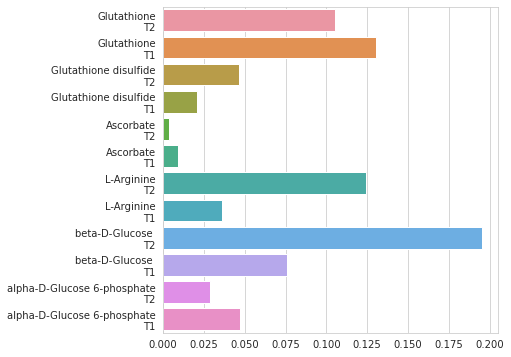

In [12]:

list1 = ['C00051','C00127','C00072']
list2 = ['C00062','C00256','C00121']
list3 = ['C00221','C00668','C00025','C02477']
list4 = list1 + list2 + list3
list_final = ['C00051','C00127','C00072','C00062','C00221','C00668']
list_ex = ['C03078','C01157','C00062']

names = ['BYG1.tsv','KOG1.tsv']
sq.plot_cids(list_final,'BYG1.tsv','KOG1.tsv')
#log_fc = m.log2(fc)

#print(log_fc)
cid_color(names[0],names[1])
sq.df_cids(list1,'BYG1.tsv','KOG1.tsv')

BYallmet_one = BYallmet#.drop_duplicates(subset='KEGG_formula', keep='first')

#BYallmet_one.KEGG_name.C00051
gsh = BYallmet.peak_height.C00051.sum()
gssg = BYallmet.peak_height.C00127.sum()
#BYallmet_one.KEGG_name.HMDB01045
enk = BYallmet.peak_height.HMDB01045.sum()

qnt_gshBY = gsh/enk

qnt_gssgBY = gssg/enk

print(f'O sinal normalizado de GSH é {qnt_gshBY} e o de GSSG é {qnt_gssgBY}')

KOallmet_one = KOallmet#.drop_duplicates(subset='KEGG_formula', keep='first')

#BYallmet_one.KEGG_name.C00051
gsh = KOallmet_one.peak_height.C00051
gssg = KOallmet_one.peak_height.C00127
#BYallmet_one.KEGG_name.HMDB01045
enk = KOallmet_one.peak_height.HMDB01045


qnt_gshKO = gsh/enk

qnt_gssgKO = gssg/enk

print(f'O sinal normalizado de GSH é {qnt_gshKO} e o de GSSG é {qnt_gssgKO}')


X = input()

#name = BYallmet_one.KEGG_name[str(X)]
met = BYallmet_one.peak_height[str(X)]
#BYallmet_one.KEGG_name.HMDB01045
enk = BYallmet_one.peak_height.HMDB01045

qnt = met/enk

print(f'O sinal normalizado é {qnt}')
